# Taller 3 Semana 11  


In [1]:
# Cargar el archivo fraudes.xlsx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Leer el archivo
dataset = pd.read_excel("fraudes.xlsx")

# Separar las características y la columna objetivo
X = dataset.drop(columns=['Class']).values
y = dataset['Class'].values

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



## Modelo 1: BernoulliNB

In [2]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Entrenar y evaluar Bernoulli Naive Bayes
modelo_nb = BernoulliNB()
modelo_nb.fit(X_train_scaled, y_train)
y_pred_nb = modelo_nb.predict(X_test_scaled)

# Resultados
resultados_nb = {
    'Modelo': 'Bernoulli NB',
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1-Score': f1_score(y_test, y_pred_nb),
    'AUC-ROC': roc_auc_score(y_test, y_pred_nb)
}
print(resultados_nb)


{'Modelo': 'Bernoulli NB', 'Accuracy': 0.8904109589041096, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8), 'F1-Score': np.float64(0.8888888888888888), 'AUC-ROC': np.float64(0.9)}


## Modelo 2: Árbol de Decisión

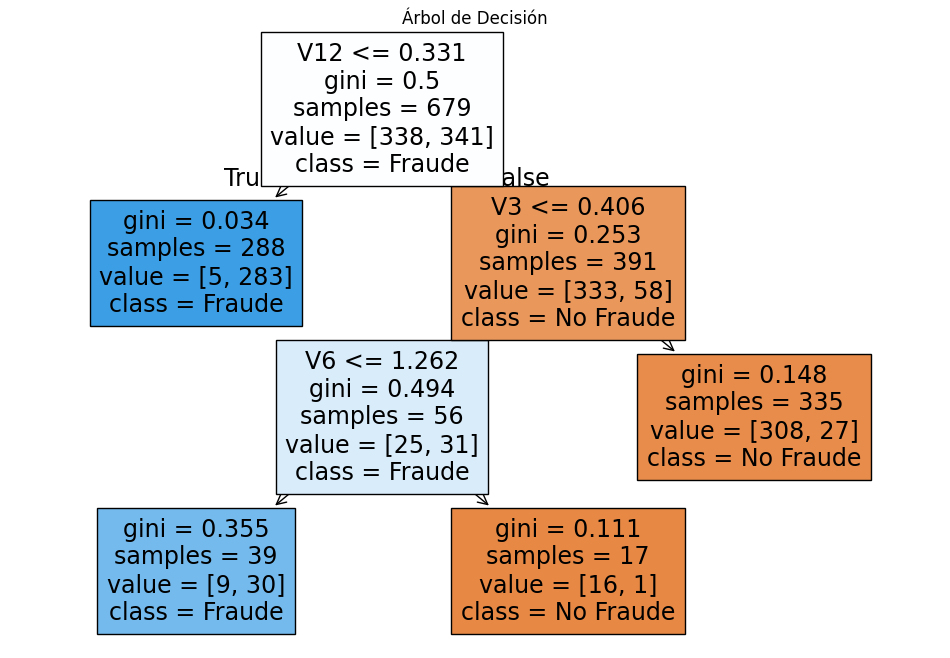

{'Modelo': 'Decision Tree', 'Accuracy': 0.952054794520548, 'Precision': np.float64(0.9866666666666667), 'Recall': np.float64(0.925), 'F1-Score': np.float64(0.9548387096774194), 'AUC-ROC': np.float64(0.9549242424242425)}


In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar y evaluar Árbol de Decisión
modelo_dt = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
modelo_dt.fit(X_train_scaled, y_train)
y_pred_dt = modelo_dt.predict(X_test_scaled)

# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(modelo_dt, filled=True, feature_names=dataset.drop(columns=['Class']).columns, class_names=['No Fraude', 'Fraude'])
plt.title("Árbol de Decisión")
plt.show()

# Resultados
resultados_dt = {
    'Modelo': 'Decision Tree',
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'AUC-ROC': roc_auc_score(y_test, y_pred_dt)
}
print(resultados_dt)




## Modelo 4: de Redes neuronales

2024-12-20 21:00:06.482890: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 21:00:06.487721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-20 21:00:06.499859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734739206.531772   24545 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734739206.540817   24545 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 21:00:06.572881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

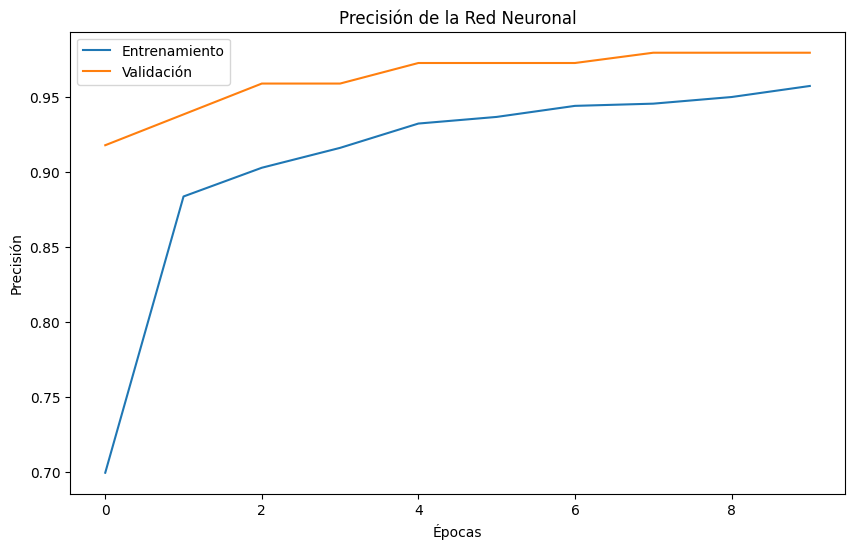

{'Modelo': 'Red Neuronal', 'Accuracy': 0.952054794520548, 'Precision': np.float64(0.9866666666666667), 'Recall': np.float64(0.925), 'F1-Score': np.float64(0.9548387096774194), 'AUC-ROC': np.float64(0.9549242424242425)}


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf

# Crear el modelo de Red Neuronal
model_nn = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar la red neuronal
history_nn = model_nn.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32, verbose=0)

# Realizar predicciones
@tf.function
def predict_nn(data):
    return model_nn(data, training=False)

y_pred_nn = (predict_nn(tf.constant(X_test_scaled)) > 0.5).numpy().astype("int32")

# Graficar el historial de entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history_nn.history['accuracy'], label='Entrenamiento')
plt.plot(history_nn.history['val_accuracy'], label='Validación')
plt.title('Precisión de la Red Neuronal')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Resultados
resultados_nn = {
    'Modelo': 'Red Neuronal',
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1-Score': f1_score(y_test, y_pred_nn),
    'AUC-ROC': roc_auc_score(y_test, y_pred_nn)
}
print(resultados_nn)


## Modelo 3: de regresión logística

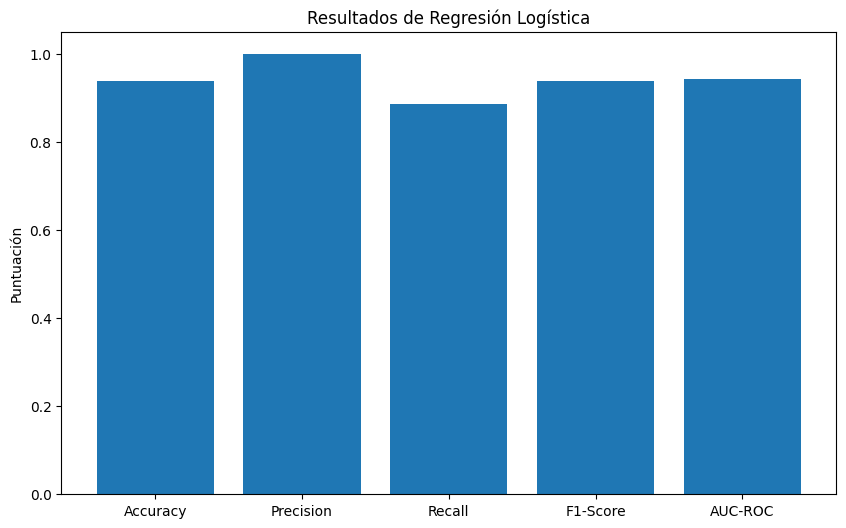

{'Modelo': 'Logistic Regression', 'Accuracy': 0.9383561643835616, 'Precision': np.float64(1.0), 'Recall': np.float64(0.8875), 'F1-Score': np.float64(0.9403973509933775), 'AUC-ROC': np.float64(0.94375)}


In [5]:
from sklearn.linear_model import LogisticRegression

# Entrenar y evaluar Regresión Logística
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_train_scaled, y_train)
y_pred_lr = modelo_lr.predict(X_test_scaled)

# Graficar resultados de Regresión Logística
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
        [accuracy_score(y_test, y_pred_lr),
         precision_score(y_test, y_pred_lr),
         recall_score(y_test, y_pred_lr),
         f1_score(y_test, y_pred_lr),
         roc_auc_score(y_test, y_pred_lr)])
plt.title("Resultados de Regresión Logística")
plt.ylabel("Puntuación")
plt.show()

# Resultados
resultados_lr = {
    'Modelo': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'AUC-ROC': roc_auc_score(y_test, y_pred_lr)
}
print(resultados_lr)



In [83]:
# Inicializar la lista para almacenar los resultados de cada modelo
resultados = []


## Modelo 4: Random Forest

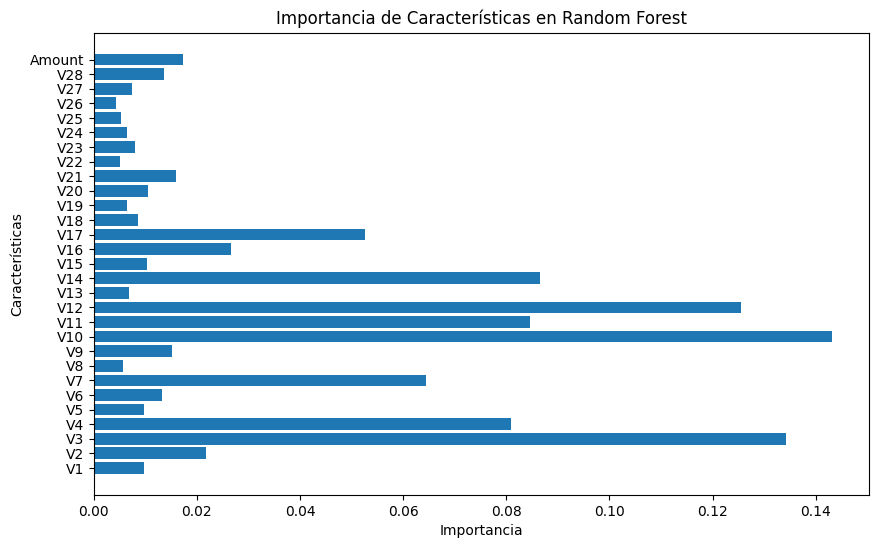

{'Modelo': 'Random Forest', 'Accuracy': 0.952054794520548, 'Precision': np.float64(1.0), 'Recall': np.float64(0.9125), 'F1-Score': np.float64(0.954248366013072), 'AUC-ROC': np.float64(0.9854166666666666)}


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar y evaluar Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)
y_pred_rf = modelo_rf.predict(X_test_scaled)

# Importancia de características en Random Forest
plt.figure(figsize=(10, 6))
plt.barh(dataset.drop(columns=['Class']).columns, modelo_rf.feature_importances_)
plt.title('Importancia de Características en Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Resultados
resultados_rf = {
    'Modelo': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
}
print(resultados_rf)




## Modelo 5: Support Vector (SVM)

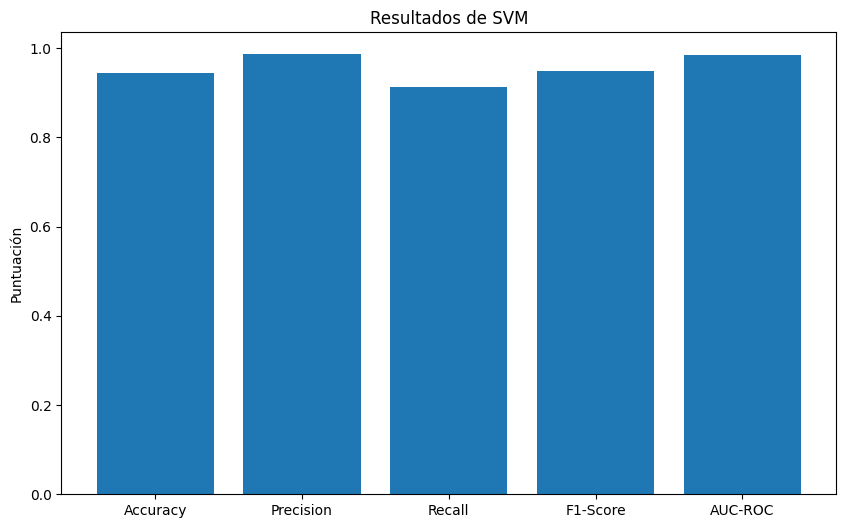

{'Modelo': 'SVM', 'Accuracy': 0.9452054794520548, 'Precision': np.float64(0.9864864864864865), 'Recall': np.float64(0.9125), 'F1-Score': np.float64(0.948051948051948), 'AUC-ROC': np.float64(0.9840909090909091)}


In [7]:
from sklearn.svm import SVC

# Entrenar y evaluar SVM
modelo_svm = SVC(kernel='linear', probability=True, random_state=42)
modelo_svm.fit(X_train_scaled, y_train)
y_pred_svm = modelo_svm.predict(X_test_scaled)

# Graficar resultados de SVM
plt.figure(figsize=(10, 6))
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
        [accuracy_score(y_test, y_pred_svm),
         precision_score(y_test, y_pred_svm),
         recall_score(y_test, y_pred_svm),
         f1_score(y_test, y_pred_svm),
         roc_auc_score(y_test, modelo_svm.predict_proba(X_test_scaled)[:, 1])])
plt.title("Resultados de SVM")
plt.ylabel("Puntuación")
plt.show()

# Resultados
resultados_svm = {
    'Modelo': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'AUC-ROC': roc_auc_score(y_test, modelo_svm.predict_proba(X_test_scaled)[:, 1])
}
print(resultados_svm)


## Comparación de los Modelos

<Figure size 1200x800 with 0 Axes>

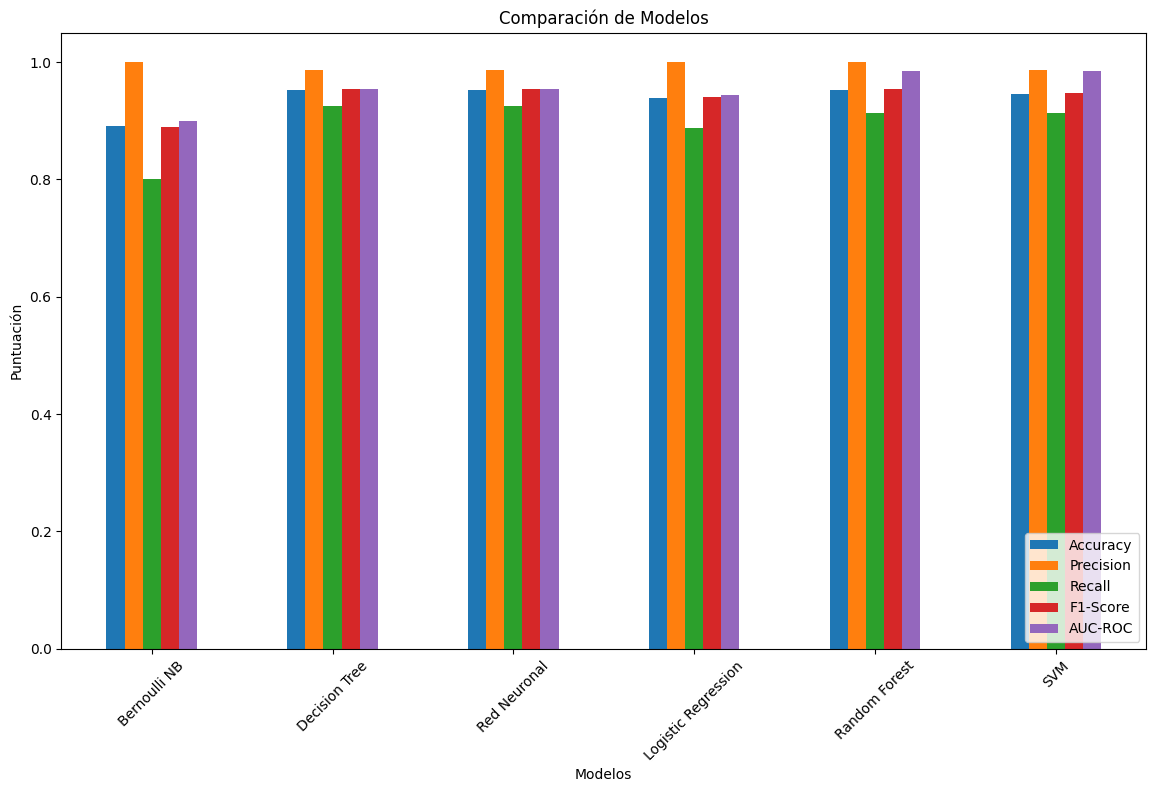

                Modelo  Accuracy  Precision  Recall  F1-Score   AUC-ROC
0         Bernoulli NB  0.890411   1.000000  0.8000  0.888889  0.900000
1        Decision Tree  0.952055   0.986667  0.9250  0.954839  0.954924
2         Red Neuronal  0.952055   0.986667  0.9250  0.954839  0.954924
3  Logistic Regression  0.938356   1.000000  0.8875  0.940397  0.943750
4        Random Forest  0.952055   1.000000  0.9125  0.954248  0.985417
5                  SVM  0.945205   0.986486  0.9125  0.948052  0.984091


In [8]:
# Crear una lista específica con los resultados de los modelos analizados
resultados_analizados = [
    resultados_nb,  # Bernoulli Naive Bayes
    resultados_dt,  # Árbol de Decisión
    resultados_nn,  # Redes Neuronales
    resultados_lr,  # Regresión Logística
    resultados_rf,  # Random Forest
    resultados_svm  # SVM
]

# Crear DataFrame con los resultados
resultados_df = pd.DataFrame(resultados_analizados)

# Graficar resultados comparativos
plt.figure(figsize=(12, 8))
resultados_df.set_index('Modelo')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()

# Mostrar tabla de resultados
print(resultados_df)



## Tiempo de Entrenamiento y Predicción

                Modelo  Tiempo Entrenamiento (s)  Tiempo Predicción (s)
0         Bernoulli NB                  0.003659               0.000987
1    Árbol de Decisión                  0.012834               0.002112
2         Red Neuronal                  1.557564               0.001441
3  Regresión Logística                  0.010397               0.000341
4        Random Forest                  0.409632               0.005106
5                  SVM                  0.061173               0.000700


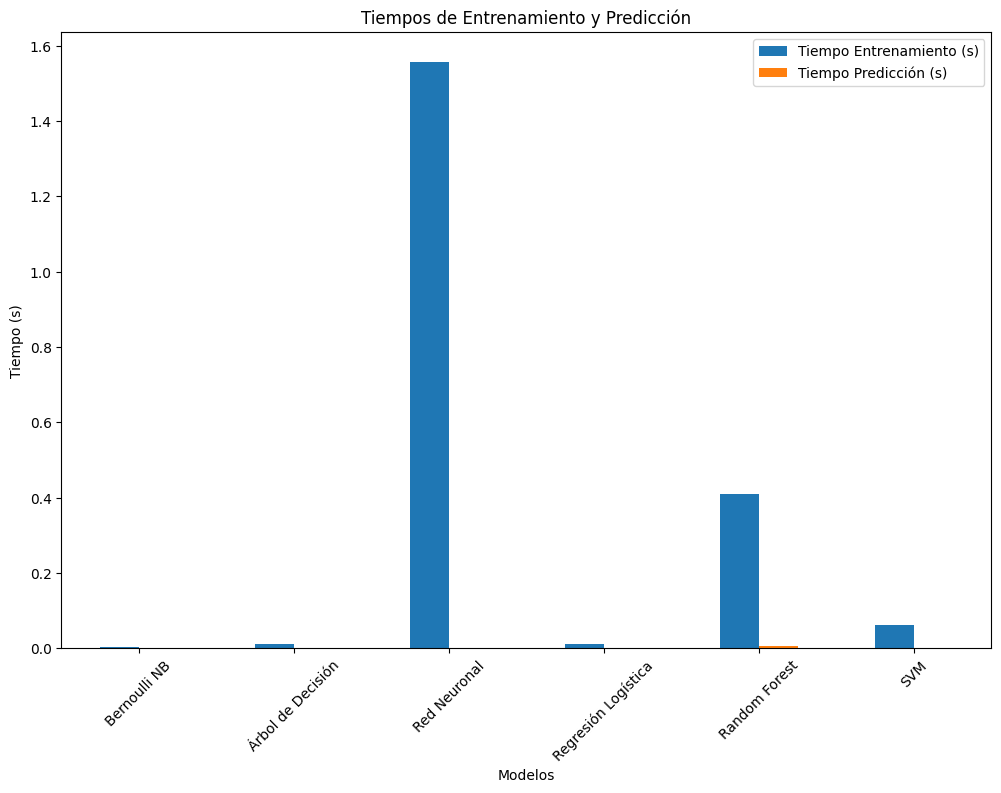

In [9]:
import time

# Diccionario para almacenar tiempos
tiempos = []

# Bernoulli Naive Bayes
inicio = time.time()
modelo_nb.fit(X_train_scaled, y_train)
fin = time.time()
tiempo_entrenamiento_nb = fin - inicio

inicio = time.time()
y_pred_nb = modelo_nb.predict(X_test_scaled)
fin = time.time()
tiempo_prediccion_nb = fin - inicio

tiempos.append({
    'Modelo': 'Bernoulli NB',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_nb,
    'Tiempo Predicción (s)': tiempo_prediccion_nb
})

# Árbol de Decisión
inicio = time.time()
modelo_dt.fit(X_train_scaled, y_train)
fin = time.time()
tiempo_entrenamiento_dt = fin - inicio

inicio = time.time()
y_pred_dt = modelo_dt.predict(X_test_scaled)
fin = time.time()
tiempo_prediccion_dt = fin - inicio

tiempos.append({
    'Modelo': 'Árbol de Decisión',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_dt,
    'Tiempo Predicción (s)': tiempo_prediccion_dt
})

# Red Neuronal
inicio = time.time()
model_nn.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=10, batch_size=32, verbose=0)
fin = time.time()
tiempo_entrenamiento_nn = fin - inicio

inicio = time.time()
y_pred_nn = (predict_nn(tf.constant(X_test_scaled)) > 0.5).numpy().astype("int32")
fin = time.time()
tiempo_prediccion_nn = fin - inicio

tiempos.append({
    'Modelo': 'Red Neuronal',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_nn,
    'Tiempo Predicción (s)': tiempo_prediccion_nn
})

# Regresión Logística
inicio = time.time()
modelo_lr.fit(X_train_scaled, y_train)
fin = time.time()
tiempo_entrenamiento_lr = fin - inicio

inicio = time.time()
y_pred_lr = modelo_lr.predict(X_test_scaled)
fin = time.time()
tiempo_prediccion_lr = fin - inicio

tiempos.append({
    'Modelo': 'Regresión Logística',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_lr,
    'Tiempo Predicción (s)': tiempo_prediccion_lr
})

# Random Forest
inicio = time.time()
modelo_rf.fit(X_train_scaled, y_train)
fin = time.time()
tiempo_entrenamiento_rf = fin - inicio

inicio = time.time()
y_pred_rf = modelo_rf.predict(X_test_scaled)
fin = time.time()
tiempo_prediccion_rf = fin - inicio

tiempos.append({
    'Modelo': 'Random Forest',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_rf,
    'Tiempo Predicción (s)': tiempo_prediccion_rf
})

# SVM
inicio = time.time()
modelo_svm.fit(X_train_scaled, y_train)
fin = time.time()
tiempo_entrenamiento_svm = fin - inicio

inicio = time.time()
y_pred_svm = modelo_svm.predict(X_test_scaled)
fin = time.time()
tiempo_prediccion_svm = fin - inicio

tiempos.append({
    'Modelo': 'SVM',
    'Tiempo Entrenamiento (s)': tiempo_entrenamiento_svm,
    'Tiempo Predicción (s)': tiempo_prediccion_svm
})

# Crear un DataFrame con los tiempos
tiempos_df = pd.DataFrame(tiempos)

# Mostrar la tabla de tiempos
print(tiempos_df)

# Graficar tiempos de entrenamiento y predicción
tiempos_df.set_index('Modelo')[['Tiempo Entrenamiento (s)', 'Tiempo Predicción (s)']].plot(kind='bar', figsize=(12, 8))
plt.title('Tiempos de Entrenamiento y Predicción')
plt.xlabel('Modelos')
plt.ylabel('Tiempo (s)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


## Matriz de Confusión

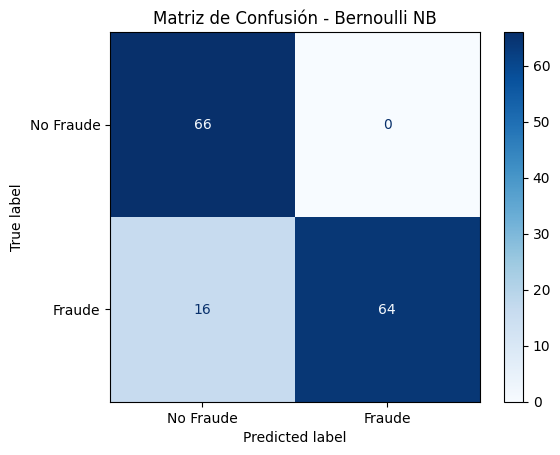

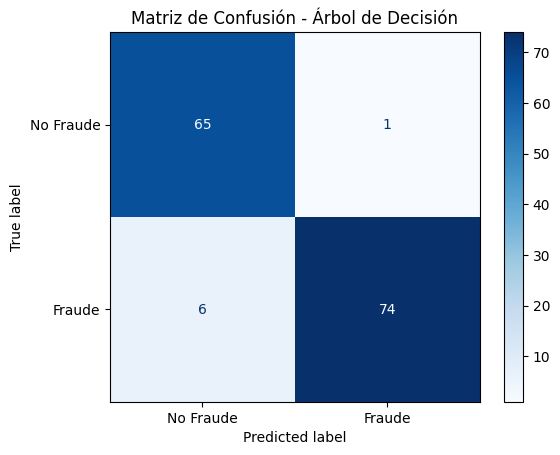

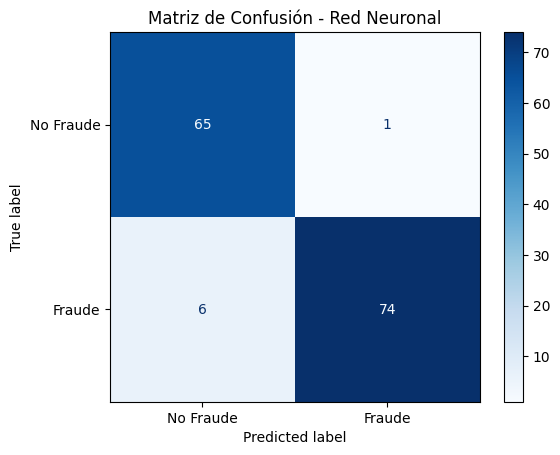

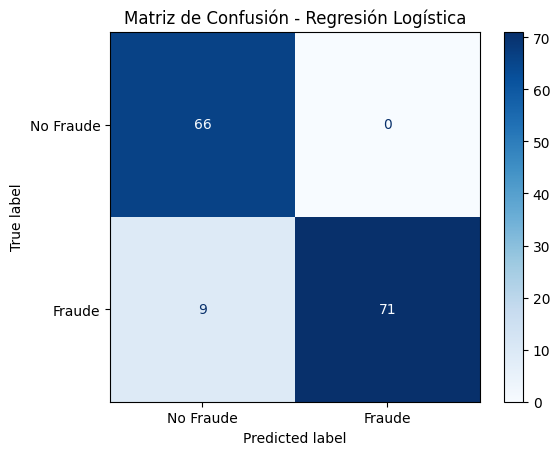

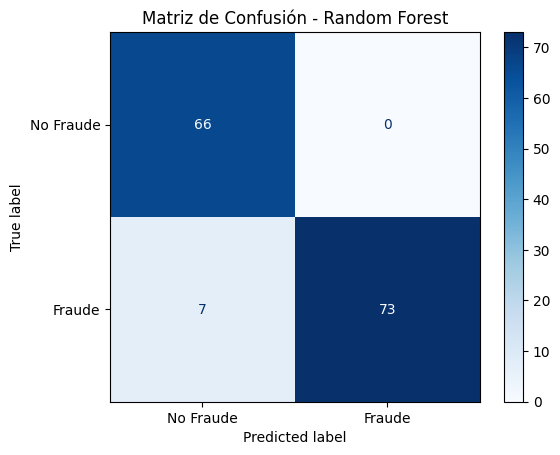

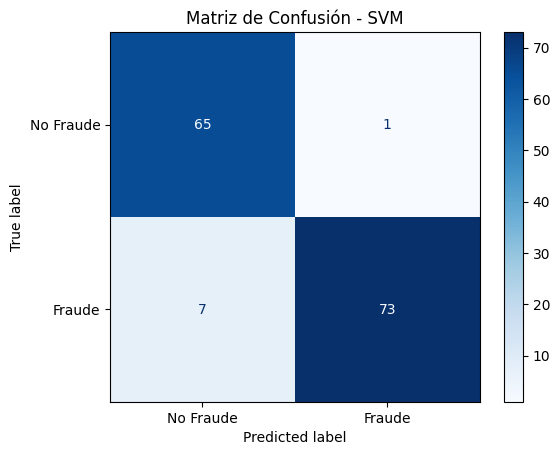

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lista para almacenar las matrices de confusión
matrices_confusion = []

# Bernoulli Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
matrices_confusion.append(('Bernoulli NB', conf_matrix_nb))

# Árbol de Decisión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
matrices_confusion.append(('Árbol de Decisión', conf_matrix_dt))

# Red Neuronal
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
matrices_confusion.append(('Red Neuronal', conf_matrix_nn))

# Regresión Logística
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
matrices_confusion.append(('Regresión Logística', conf_matrix_lr))

# Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
matrices_confusion.append(('Random Forest', conf_matrix_rf))

# SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
matrices_confusion.append(('SVM', conf_matrix_svm))

# Graficar cada matriz de confusión
for modelo, conf_matrix in matrices_confusion:
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Fraude', 'Fraude'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {modelo}")
    plt.show()


## Curva ROC y AUC

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


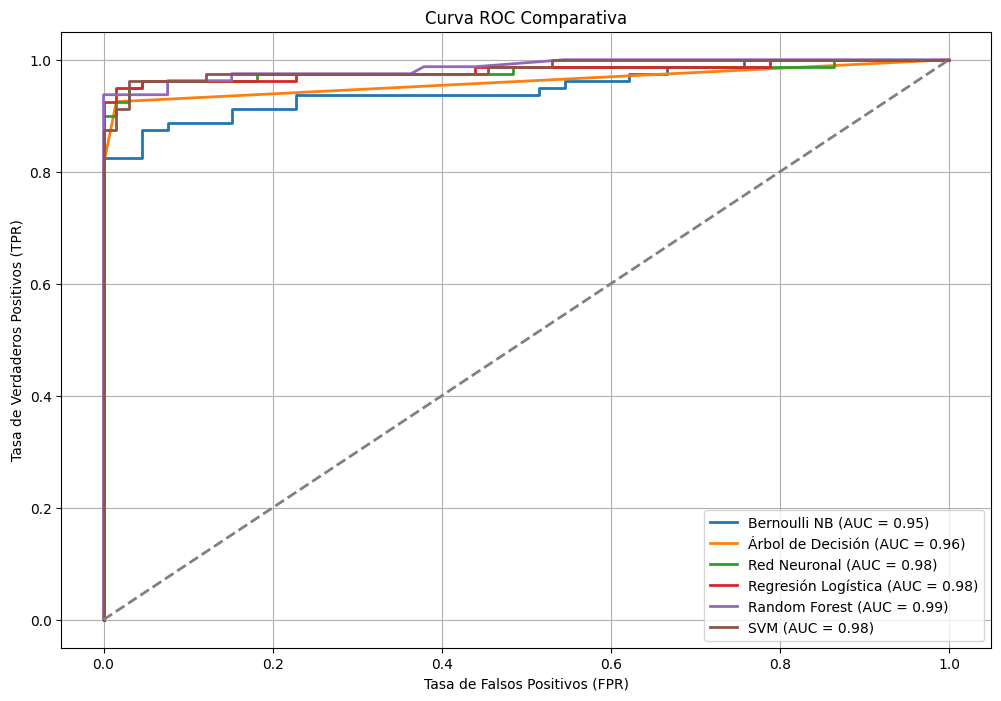

In [11]:
from sklearn.metrics import roc_curve, auc

# Lista para almacenar las curvas y valores de AUC
curvas_roc = []

# Bernoulli Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, modelo_nb.predict_proba(X_test_scaled)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
curvas_roc.append(('Bernoulli NB', fpr_nb, tpr_nb, roc_auc_nb))

# Árbol de Decisión
fpr_dt, tpr_dt, _ = roc_curve(y_test, modelo_dt.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
curvas_roc.append(('Árbol de Decisión', fpr_dt, tpr_dt, roc_auc_dt))

# Red Neuronal
fpr_nn, tpr_nn, _ = roc_curve(y_test, model_nn.predict(X_test_scaled).ravel())
roc_auc_nn = auc(fpr_nn, tpr_nn)
curvas_roc.append(('Red Neuronal', fpr_nn, tpr_nn, roc_auc_nn))

# Regresión Logística
fpr_lr, tpr_lr, _ = roc_curve(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
curvas_roc.append(('Regresión Logística', fpr_lr, tpr_lr, roc_auc_lr))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, modelo_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
curvas_roc.append(('Random Forest', fpr_rf, tpr_rf, roc_auc_rf))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, modelo_svm.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
curvas_roc.append(('SVM', fpr_svm, tpr_svm, roc_auc_svm))

# Graficar todas las curvas ROC
plt.figure(figsize=(12, 8))
for modelo, fpr, tpr, roc_auc in curvas_roc:
    plt.plot(fpr, tpr, lw=2, label=f'{modelo} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Línea diagonal
plt.title('Curva ROC Comparativa')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Capacidad de Generalización

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
                Modelo  Accuracy
0         Bernoulli NB      1.00
1    Árbol de Decisión      1.00
2         Red Neuronal      1.00
3  Regresión Logística      0.95
4        Random Forest      1.00
5                  SVM      0.95


<Figure size 1200x600 with 0 Axes>

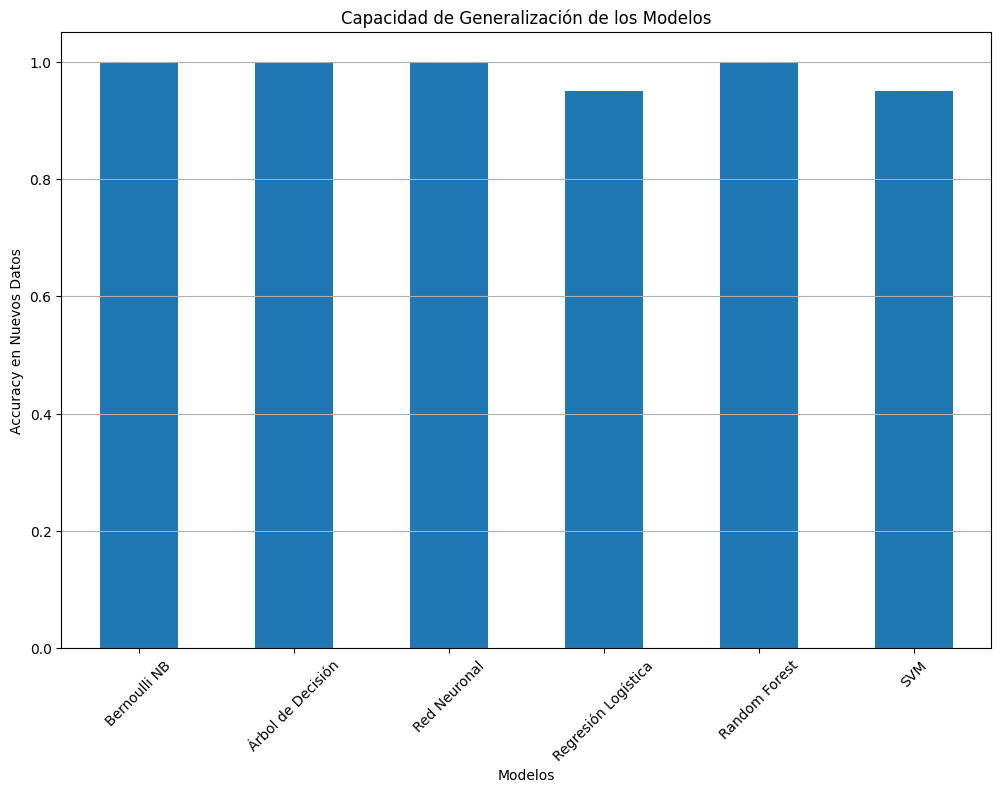

In [12]:
# Crear un conjunto de datos nuevo (simulado para el ejemplo)
import numpy as np

# Generar un subconjunto simulado de nuevos datos
X_nuevo = scaler.transform(X[:20])  # Usar algunas filas originales escaladas
y_nuevo = y[:20]

# Lista para almacenar resultados en los nuevos datos
generalizacion = []

# Bernoulli Naive Bayes
y_pred_nuevo_nb = modelo_nb.predict(X_nuevo)
accuracy_nuevo_nb = accuracy_score(y_nuevo, y_pred_nuevo_nb)
generalizacion.append({
    'Modelo': 'Bernoulli NB',
    'Accuracy': accuracy_nuevo_nb
})

# Árbol de Decisión
y_pred_nuevo_dt = modelo_dt.predict(X_nuevo)
accuracy_nuevo_dt = accuracy_score(y_nuevo, y_pred_nuevo_dt)
generalizacion.append({
    'Modelo': 'Árbol de Decisión',
    'Accuracy': accuracy_nuevo_dt
})

# Red Neuronal
y_pred_nuevo_nn = (model_nn.predict(X_nuevo) > 0.5).astype("int32").ravel()
accuracy_nuevo_nn = accuracy_score(y_nuevo, y_pred_nuevo_nn)
generalizacion.append({
    'Modelo': 'Red Neuronal',
    'Accuracy': accuracy_nuevo_nn
})

# Regresión Logística
y_pred_nuevo_lr = modelo_lr.predict(X_nuevo)
accuracy_nuevo_lr = accuracy_score(y_nuevo, y_pred_nuevo_lr)
generalizacion.append({
    'Modelo': 'Regresión Logística',
    'Accuracy': accuracy_nuevo_lr
})

# Random Forest
y_pred_nuevo_rf = modelo_rf.predict(X_nuevo)
accuracy_nuevo_rf = accuracy_score(y_nuevo, y_pred_nuevo_rf)
generalizacion.append({
    'Modelo': 'Random Forest',
    'Accuracy': accuracy_nuevo_rf
})

# SVM
y_pred_nuevo_svm = modelo_svm.predict(X_nuevo)
accuracy_nuevo_svm = accuracy_score(y_nuevo, y_pred_nuevo_svm)
generalizacion.append({
    'Modelo': 'SVM',
    'Accuracy': accuracy_nuevo_svm
})

# Crear un DataFrame con los resultados de generalización
generalizacion_df = pd.DataFrame(generalizacion)

# Mostrar la tabla de resultados
print(generalizacion_df)

# Graficar resultados de capacidad de generalización
plt.figure(figsize=(12, 6))
generalizacion_df.set_index('Modelo').plot(kind='bar', figsize=(12, 8), legend=False)
plt.title('Capacidad de Generalización de los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy en Nuevos Datos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Métricas Avanzadas

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
                Modelo  Kappa de Cohen  Log-Loss
0         Bernoulli NB        0.783383  1.327327
1    Árbol de Decisión        0.903857  0.174916
2         Red Neuronal        0.903857  0.167379
3  Regresión Logística        0.877035  0.154432
4        Random Forest        0.904110  0.148907
5                  SVM        0.890267  0.148441


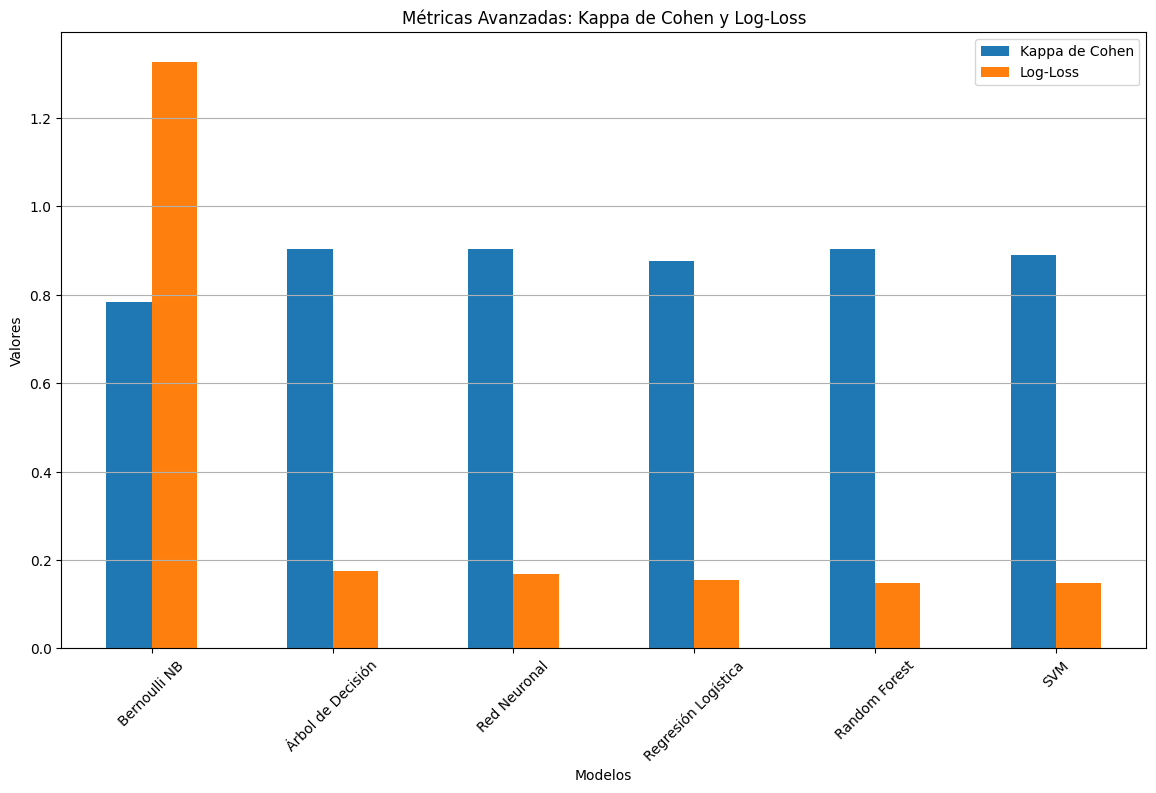

In [13]:
from sklearn.metrics import cohen_kappa_score, log_loss

# Lista para almacenar las métricas avanzadas
metricas_avanzadas = []

# Bernoulli Naive Bayes
kappa_nb = cohen_kappa_score(y_test, y_pred_nb)
log_loss_nb = log_loss(y_test, modelo_nb.predict_proba(X_test_scaled))
metricas_avanzadas.append({
    'Modelo': 'Bernoulli NB',
    'Kappa de Cohen': kappa_nb,
    'Log-Loss': log_loss_nb
})

# Árbol de Decisión
kappa_dt = cohen_kappa_score(y_test, y_pred_dt)
log_loss_dt = log_loss(y_test, modelo_dt.predict_proba(X_test_scaled))
metricas_avanzadas.append({
    'Modelo': 'Árbol de Decisión',
    'Kappa de Cohen': kappa_dt,
    'Log-Loss': log_loss_dt
})

# Red Neuronal
kappa_nn = cohen_kappa_score(y_test, y_pred_nn)
log_loss_nn = log_loss(y_test, model_nn.predict(X_test_scaled).ravel())
metricas_avanzadas.append({
    'Modelo': 'Red Neuronal',
    'Kappa de Cohen': kappa_nn,
    'Log-Loss': log_loss_nn
})

# Regresión Logística
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, modelo_lr.predict_proba(X_test_scaled))
metricas_avanzadas.append({
    'Modelo': 'Regresión Logística',
    'Kappa de Cohen': kappa_lr,
    'Log-Loss': log_loss_lr
})

# Random Forest
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, modelo_rf.predict_proba(X_test_scaled))
metricas_avanzadas.append({
    'Modelo': 'Random Forest',
    'Kappa de Cohen': kappa_rf,
    'Log-Loss': log_loss_rf
})

# SVM
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, modelo_svm.predict_proba(X_test_scaled))
metricas_avanzadas.append({
    'Modelo': 'SVM',
    'Kappa de Cohen': kappa_svm,
    'Log-Loss': log_loss_svm
})

# Crear un DataFrame con las métricas avanzadas
metricas_avanzadas_df = pd.DataFrame(metricas_avanzadas)

# Mostrar la tabla de métricas avanzadas
print(metricas_avanzadas_df)

# Graficar las métricas avanzadas
metricas_avanzadas_df.set_index('Modelo').plot(kind='bar', figsize=(14, 8))
plt.title('Métricas Avanzadas: Kappa de Cohen y Log-Loss')
plt.xlabel('Modelos')
plt.ylabel('Valores')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Visualización de Fronteras de Decisión

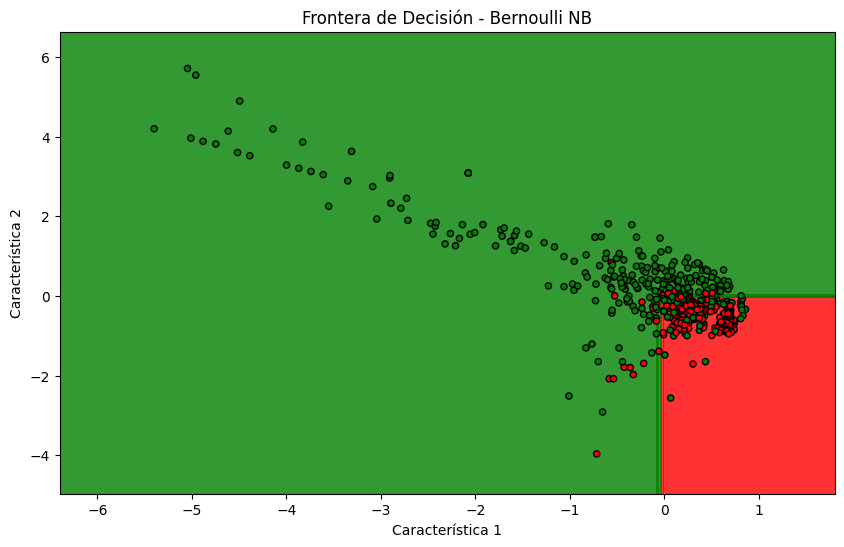

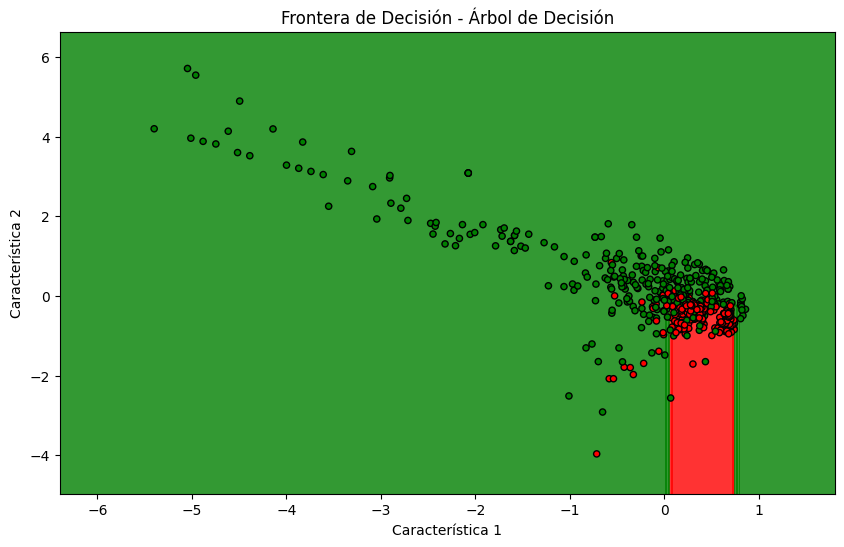

304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step


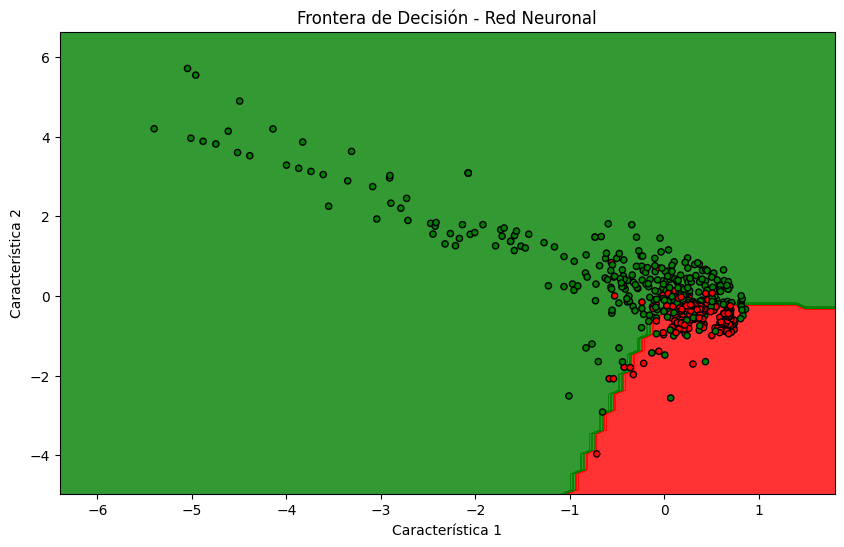

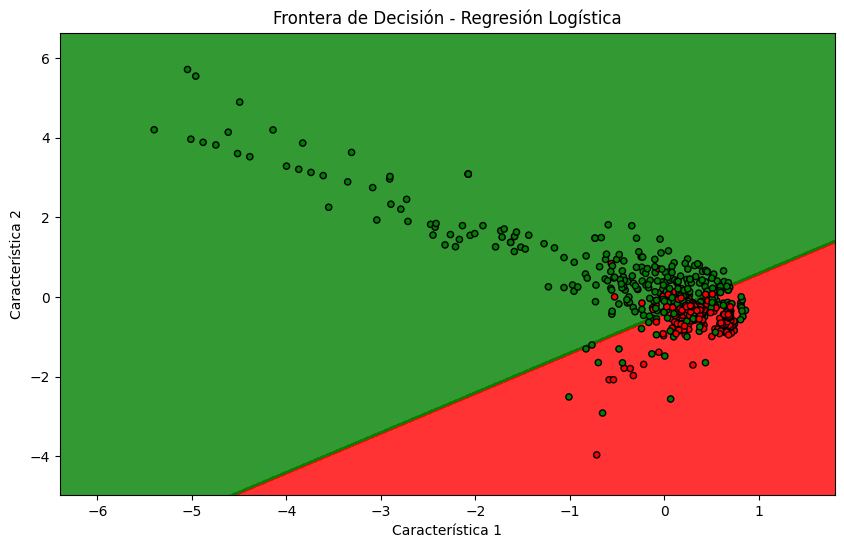

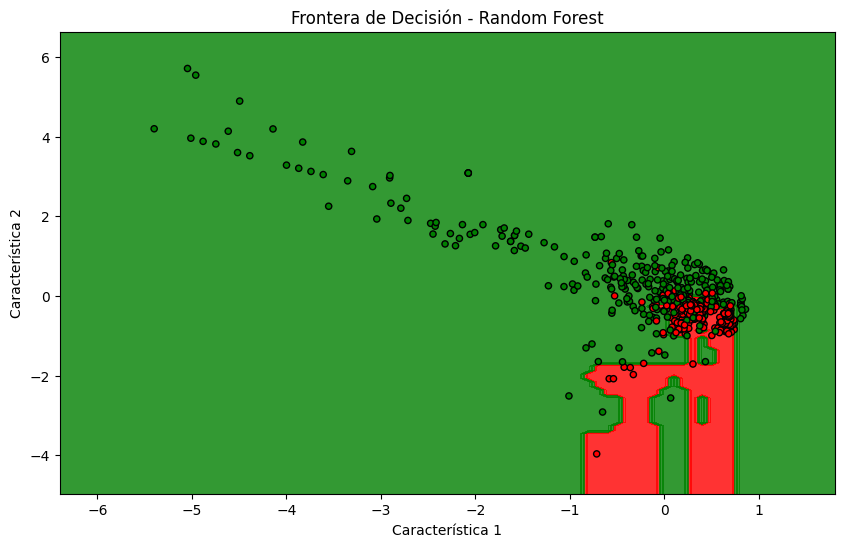

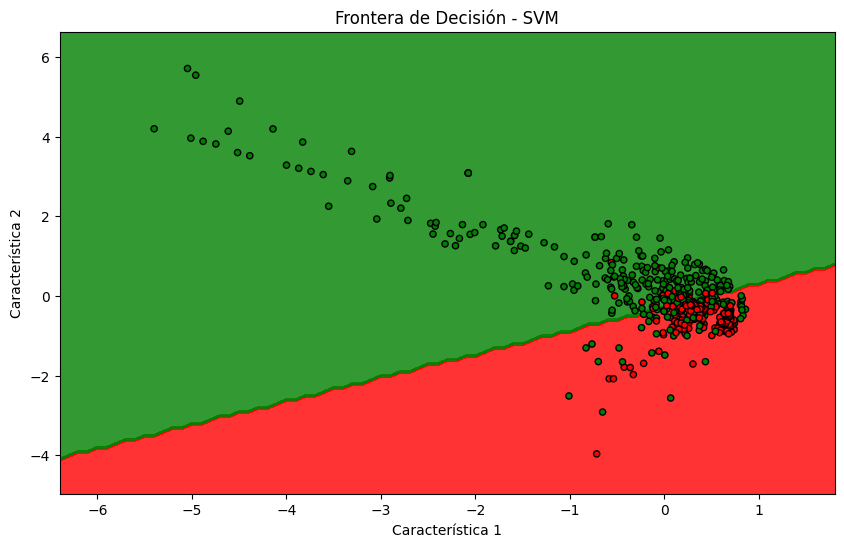

In [14]:
from matplotlib.colors import ListedColormap
import numpy as np

# Seleccionar solo dos características para la visualización
X_train_2d = X_train_scaled[:, :2]  # Usar las dos primeras características
X_test_2d = X_test_scaled[:, :2]

# Lista para almacenar modelos reentrenados en 2D
modelos_2d = []

# Bernoulli Naive Bayes
modelo_nb_2d = BernoulliNB()
modelo_nb_2d.fit(X_train_2d, y_train)
modelos_2d.append(('Bernoulli NB', modelo_nb_2d))

# Árbol de Decisión
modelo_dt_2d = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
modelo_dt_2d.fit(X_train_2d, y_train)
modelos_2d.append(('Árbol de Decisión', modelo_dt_2d))

# Red Neuronal
modelo_nn_2d = Sequential([
    Input(shape=(2,)),  # Cambiar a 2 dimensiones
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
modelo_nn_2d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_nn_2d.fit(X_train_2d, y_train, epochs=10, batch_size=32, verbose=0)
modelos_2d.append(('Red Neuronal', modelo_nn_2d))

# Regresión Logística
modelo_lr_2d = LogisticRegression(random_state=42)
modelo_lr_2d.fit(X_train_2d, y_train)
modelos_2d.append(('Regresión Logística', modelo_lr_2d))

# Random Forest
modelo_rf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_2d.fit(X_train_2d, y_train)
modelos_2d.append(('Random Forest', modelo_rf_2d))

# SVM
modelo_svm_2d = SVC(kernel='linear', probability=True, random_state=42)
modelo_svm_2d.fit(X_train_2d, y_train)
modelos_2d.append(('SVM', modelo_svm_2d))

# Crear la malla para graficar las fronteras
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Graficar las fronteras de decisión
for modelo_nombre, modelo in modelos_2d:
    plt.figure(figsize=(10, 6))
    if modelo_nombre == 'Red Neuronal':
        Z = (modelo.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype("int32")  # Red Neuronal
    else:
        Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])  # Otros modelos
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=20, cmap=ListedColormap(('red', 'green')))
    plt.title(f"Frontera de Decisión - {modelo_nombre}")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()
